# **Analisando os dados dosc cursos do ProUni**
Com base nos dados obtidos no site brasil.io vamos analisar distribuição e valores de mensalidades de todos os cursos listados no ProUni 2018

Arquivo csv -> cursos-prouni-5d41dcb05ccf4473b2451a47ad5abafe.csv

In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Carregando o arquivo para o pandas
#df = pd.read_csv('cursos-prouni-5d41dcb05ccf4473b2451a47ad5abafe.csv')
df = pd.read_csv('https://raw.githubusercontent.com/oceanalves/DataScience/main/DataSets/cursos-prouni.csv')

# Mostrando os 5 primeiros cursos
df.head()

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,AC,Acrelandia,Universidade Paulista - UNIP,ACRELANDIA - Centro,Administração,Bacharelado,Curso a Distância,289.0,1.0,1.0,NaN,NaN,572.74,548.0,NaN,NaN
1,AC,Cruzeiro do Sul,Centro Universitário Internacional - Uninter -...,PAP CRUZEIRO DO SUL - Centro,Administração,Bacharelado,Curso a Distância,298.0,1.0,NaN,NaN,NaN,646.14,NaN,NaN,NaN
2,AC,Cruzeiro do Sul,Faculdade Educacional da Lapa - FAEL,AC - CRUZEIRO DO SUL - POLO EAD - CENTRO,Administração,Bacharelado,Curso a Distância,325.0,NaN,NaN,1.0,NaN,NaN,NaN,577.62,NaN
3,AC,Cruzeiro do Sul,Universidade Paulista - UNIP,CRUZEIRO DO SUL - Centro,Administração,Bacharelado,Curso a Distância,319.0,1.0,NaN,NaN,NaN,616.68,NaN,NaN,NaN
4,AC,Rio Branco,Centro Universitário Internacional - Uninter -...,PAP RIO BRANCO - Bosque,Administração,Bacharelado,Curso a Distância,298.0,NaN,NaN,1.0,NaN,NaN,NaN,569.00,NaN


In [4]:
# Qual o tamanho do conjunto de dados em termos de (linhas, colunas)
df.shape

(41447, 16)

In [5]:
# Os tipos de dados de cada coluna
df.dtypes

uf_busca                 object
cidade_busca             object
universidade_nome        object
campus_nome              object
nome                     object
grau                     object
turno                    object
mensalidade             float64
bolsa_integral_cotas    float64
bolsa_integral_ampla    float64
bolsa_parcial_cotas     float64
bolsa_parcial_ampla     float64
nota_integral_ampla     float64
nota_integral_cotas     float64
nota_parcial_ampla      float64
nota_parcial_cotas      float64
dtype: object

In [6]:
# Análise matemática das colunas numéricas
df.describe()

,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,41447.000000,32520.000000,25404.000000,8828.000000,13041.000000,32520.000000,16802.000000,16350.000000,5519.000000
mean,622.636966,1.535394,2.513541,1.873018,8.632544,575.982999,564.470439,527.517136,511.799638
std,606.442296,2.191578,3.019549,2.336403,18.372991,57.827594,57.869145,60.202170,56.787140
min,139.000000,0.000000,1.000000,1.000000,1.000000,450.000000,450.000000,450.000000,450.000000
25%,278.000000,0.000000,1.000000,1.000000,1.000000,544.360000,532.865000,453.980000,450.000000
50%,393.350000,1.000000,1.000000,1.000000,2.000000,580.740000,571.450000,532.420000,511.820000
75%,825.000000,2.000000,3.000000,2.000000,6.000000,614.145000,603.315000,573.235000,557.170000
max,9999.990000,58.000000,67.000000,74.000000,350.000000,781.200000,792.240000,776.360000,768.340000


In [7]:
# Uma outra forma de visualizar o conjuto de dados
# Nesse caso podemos ver claramente as colunas que possuem valores nulos, pois a quantidade de linhas é menor
# que o tamanho do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41447 entries, 0 to 41446
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uf_busca              41447 non-null  object 
 1   cidade_busca          41447 non-null  object 
 2   universidade_nome     41447 non-null  object 
 3   campus_nome           41447 non-null  object 
 4   nome                  41447 non-null  object 
 5   grau                  41447 non-null  object 
 6   turno                 41447 non-null  object 
 7   mensalidade           41447 non-null  float64
 8   bolsa_integral_cotas  32520 non-null  float64
 9   bolsa_integral_ampla  25404 non-null  float64
 10  bolsa_parcial_cotas   8828 non-null   float64
 11  bolsa_parcial_ampla   13041 non-null  float64
 12  nota_integral_ampla   32520 non-null  float64
 13  nota_integral_cotas   16802 non-null  float64
 14  nota_parcial_ampla    16350 non-null  float64
 15  nota_parcial_cotas 

In [8]:
# Quantidade de cursos por UF
df['uf_busca'].value_counts()

SP    11533
MG     4175
PR     3918
RS     3060
BA     2505
SC     2195
RJ     1442
GO     1278
PA     1201
PE     1148
DF     1063
MT     1063
ES      825
CE      816
MS      785
MA      679
PB      596
RO      463
AM      429
PI      405
TO      343
RN      342
AL      327
SE      323
AP      219
AC      203
RR      111
Name: uf_busca, dtype: int64

In [9]:
# Qual o curso com mensalidade mais alta?
df[df['mensalidade'] == df['mensalidade'].max()]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
31987,MS,Campo Grande,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,Medicina,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,740.22,726.46,NaN,NaN


In [10]:
# Qual o curso com mensalidade mais baixa?
df[df['mensalidade'] == df['mensalidade'].min()]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
20454,PA,Santarem,Universidade Paulista - UNIP,SANTARÉM - Fátima,Gestão Ambiental,Tecnológico,Curso a Distância,139.0,3.0,1.0,NaN,NaN,605.32,573.7,NaN,NaN
22934,DF,Brasilia,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,Gestão de Recursos Humanos,Tecnológico,Vespertino,139.0,1.0,NaN,NaN,NaN,580.76,NaN,NaN,NaN
39118,ES,Vitoria,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,Serviço Social,Bacharelado,Curso a Distância,139.0,1.0,NaN,NaN,NaN,548.26,NaN,NaN,NaN


In [11]:
# Qual o curso com mensalidade mais baixa?
df[df['mensalidade'] == df['mensalidade'].min()][['uf_busca', 'cidade_busca']]

,uf_busca,cidade_busca
20454,PA,Santarem
22934,DF,Brasilia
39118,ES,Vitoria


In [12]:
# Cinco menores mensalidades:
df.nsmallest(5, 'mensalidade')

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
20454,PA,Santarem,Universidade Paulista - UNIP,SANTARÉM - Fátima,Gestão Ambiental,Tecnológico,Curso a Distância,139.0,3.0,1.0,NaN,NaN,605.32,573.7,NaN,NaN
22934,DF,Brasilia,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,Gestão de Recursos Humanos,Tecnológico,Vespertino,139.0,1.0,NaN,NaN,NaN,580.76,NaN,NaN,NaN
39118,ES,Vitoria,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,Serviço Social,Bacharelado,Curso a Distância,139.0,1.0,NaN,NaN,NaN,548.26,NaN,NaN,NaN
30989,SP,Sao VIcente,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,Marketing,Tecnológico,Curso a Distância,144.0,1.0,2.0,2.0,5.0,533.34,450.0,450.0,450.0
20836,AC,Acrelandia,Universidade Paulista - UNIP,ACRELANDIA - Centro,Gestão Comercial,Tecnológico,Curso a Distância,149.0,1.0,NaN,NaN,NaN,545.64,NaN,NaN,NaN


In [13]:
# Qual a mensalidade mais cara em cada UF?
df.groupby('uf_busca')['mensalidade'].max()

uf_busca
AC    9674.34
AL    7290.00
AM    2127.05
AP    3607.62
BA    9048.00
CE    9836.40
DF    6757.92
ES    6022.28
GO    6484.47
MA    8281.38
MG    9350.00
MS    9999.99
MT    9208.00
PA    8508.54
PB    8350.00
PE    7250.00
PI    8402.00
PR    8466.72
RJ    9023.07
RN    6505.09
RO    6909.97
RR    1463.05
RS    8329.95
SC    6922.15
SE    6490.00
SP    9715.61
TO    7800.00
Name: mensalidade, dtype: float64

In [14]:
# E a mensalidade mais barata em cada UF?
df.groupby('uf_busca')['mensalidade'].min()

uf_busca
AC    149.0
AL    149.0
AM    149.0
AP    149.0
BA    149.0
CE    169.0
DF    139.0
ES    139.0
GO    149.0
MA    149.0
MG    149.0
MS    149.0
MT    149.0
PA    139.0
PB    149.0
PE    149.0
PI    149.0
PR    149.0
RJ    149.0
RN    149.0
RO    149.0
RR    169.0
RS    149.0
SC    149.0
SE    169.0
SP    144.0
TO    149.0
Name: mensalidade, dtype: float64

In [15]:
# Mas não queremos saber apenas as maiores mensalidades mas sim todos os dados desses cursos
# Vamos listar os cursos de cada UF que possuem a maior mensalidade
df.loc[df.groupby('uf_busca')['mensalidade'].idxmax()]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
31940,AC,Rio Branco,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,Medicina,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,758.32,723.94,734.92,711.26
31941,AL,Maceio,Centro Universitário Tiradentes - FITS,CAMPUS - MACEIÓ - CRUZ DAS ALMAS - Cruz das A...,Medicina,Bacharelado,Integral,7290.00,5.0,2.0,NaN,NaN,753.02,735.26,NaN,NaN
32962,AM,Manaus,Faculdade Uninassau Manaus,FACULDADE SANTA DOROTEIA DO AMAZONAS - Nossa S...,Odontologia,Bacharelado,Matutino,2127.05,4.0,1.0,NaN,NaN,639.22,628.52,NaN,NaN
32966,AP,Macapa,Instituto Macapaense de Ensino Superior - IMMES,CAMPUS - MACAPÁ - CENTRO - Centro,Odontologia,Bacharelado,Noturno,3607.62,0.0,1.0,NaN,1.0,690.32,NaN,620.44,NaN
31945,BA,Lauro de Freitas,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,Medicina,Bacharelado,Integral,9048.00,13.0,4.0,NaN,NaN,741.04,730.36,NaN,NaN
12916,CE,Crateus,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,Enfermagem,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,663.36,NaN,NaN,NaN
31950,DF,Brasilia,Faculdades Integradas da União Educacional do ...,UNIDADE GAMA - Setor Leste Gama,Medicina,Bacharelado,Integral,6757.92,8.0,7.0,NaN,NaN,745.58,731.24,NaN,NaN
31952,ES,Colatina,Centro Universitário do Espírito Santo - Unesc...,UNIDADE SEDE - Martinelli,Medicina,Bacharelado,Integral,6022.28,NaN,NaN,3.0,3.0,NaN,NaN,750.02,727.00
31957,GO,Goiania,Pontifícia Universidade Católica de Goiás - PU...,GOIÂNIA (SEDE) - SETOR UNIVERSITÁRIO,Medicina,Bacharelado,Integral,6484.47,3.0,2.0,NaN,NaN,763.24,749.98,NaN,NaN
31959,MA,Imperatriz,Universidade do Ceuma - Uniceuma - UNICEUMA,UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPE...,Medicina,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,756.46,737.88,747.14,717.60


In [ ]:
# Em algumas UFS, como PR por exemplo, podemos ter mais de um curso com a mensalidade mais cara
# e nossa solução anterior não mostra isso. A solução abaixo funciona perfeitamente, apesar de ser mais complexa
df[df['mensalidade'] == df.groupby(['uf_busca'])['mensalidade'].transform(max)]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
11916,PR,Curitiba,Faculdade Dom Bosco - FDB,UNIDADE MERCÊS - Mercês,Educação Física,Licenciatura,Matutino,8466.72,1.0,2.0,NaN,NaN,579.20,570.40,NaN,NaN
11917,PR,Curitiba,Faculdade Dom Bosco - FDB,UNIDADE MERCÊS - Mercês,Educação Física,Bacharelado,Matutino,8466.72,1.0,4.0,NaN,NaN,589.08,577.32,NaN,NaN
12916,CE,Crateus,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,Enfermagem,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,663.36,NaN,NaN,NaN
31940,AC,Rio Branco,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,Medicina,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,758.32,723.94,734.92,711.26
31941,AL,Maceio,Centro Universitário Tiradentes - FITS,CAMPUS - MACEIÓ - CRUZ DAS ALMAS - Cruz das A...,Medicina,Bacharelado,Integral,7290.00,5.0,2.0,NaN,NaN,753.02,735.26,NaN,NaN
31945,BA,Lauro de Freitas,Faculdade de Ciências Agrárias e da Saúde - FAS,UNIDADE SEDE - Centro,Medicina,Bacharelado,Integral,9048.00,13.0,4.0,NaN,NaN,741.04,730.36,NaN,NaN
31950,DF,Brasilia,Faculdades Integradas da União Educacional do ...,UNIDADE GAMA - Setor Leste Gama,Medicina,Bacharelado,Integral,6757.92,8.0,7.0,NaN,NaN,745.58,731.24,NaN,NaN
31952,ES,Colatina,Centro Universitário do Espírito Santo - Unesc...,UNIDADE SEDE - Martinelli,Medicina,Bacharelado,Integral,6022.28,NaN,NaN,3.0,3.0,NaN,NaN,750.02,727.00
31957,GO,Goiania,Pontifícia Universidade Católica de Goiás - PU...,GOIÂNIA (SEDE) - SETOR UNIVERSITÁRIO,Medicina,Bacharelado,Integral,6484.47,3.0,2.0,NaN,NaN,763.24,749.98,NaN,NaN
31959,MA,Imperatriz,Universidade do Ceuma - Uniceuma - UNICEUMA,UNIVERSIDADE DO CEUMA - UNICEUMA - CAMPUS IMPE...,Medicina,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,756.46,737.88,747.14,717.60


In [16]:
# De forma semelhante, podemos listar os cursos com menores mensalidades
df.loc[df.groupby('uf_busca')['mensalidade'].idxmin()]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
20836,AC,Acrelandia,Universidade Paulista - UNIP,ACRELANDIA - Centro,Gestão Comercial,Tecnológico,Curso a Distância,149.0,1.0,NaN,NaN,NaN,545.64,NaN,NaN,NaN
40470,AL,Maceio,Universidade Paulista - UNIP,MACEIÓ III - Barro Duro,Sociologia,Licenciatura,Curso a Distância,149.0,1.0,NaN,NaN,NaN,554.40,NaN,NaN,NaN
20845,AM,Coari,Universidade Paulista - UNIP,COARI - Espírito Santo,Gestão Comercial,Tecnológico,Curso a Distância,149.0,1.0,NaN,NaN,NaN,492.54,NaN,NaN,NaN
40476,AP,Macapa,Universidade Paulista - UNIP,MACAPÁ II - Centro,Sociologia,Licenciatura,Curso a Distância,149.0,1.0,NaN,NaN,NaN,547.18,NaN,NaN,NaN
40478,BA,Caldeirao Grande,Universidade Paulista - UNIP,CALDEIRAO GRANDE - Centro,Sociologia,Licenciatura,Curso a Distância,149.0,2.0,NaN,NaN,NaN,521.08,NaN,NaN,NaN
22203,CE,Fortaleza,Universidade Paulista - UNIP,FORTALEZA I - Fátima,Gestão da Tecnologia da Informação,Tecnológico,Curso a Distância,169.0,3.0,2.0,NaN,NaN,628.02,607.80,NaN,NaN
22934,DF,Brasilia,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,Gestão de Recursos Humanos,Tecnológico,Vespertino,139.0,1.0,NaN,NaN,NaN,580.76,NaN,NaN,NaN
39118,ES,Vitoria,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,Serviço Social,Bacharelado,Curso a Distância,139.0,1.0,NaN,NaN,NaN,548.26,NaN,NaN,NaN
20949,GO,Anapolis,Universidade Paulista - UNIP,ANAPOLIS - Jundiaí,Gestão Comercial,Tecnológico,Curso a Distância,149.0,1.0,NaN,NaN,NaN,572.00,NaN,NaN,NaN
40505,MA,Sao Luis,Universidade Paulista - UNIP,SÃO LUÍS II - Calhau,Sociologia,Licenciatura,Curso a Distância,149.0,1.0,NaN,NaN,NaN,572.80,NaN,NaN,NaN


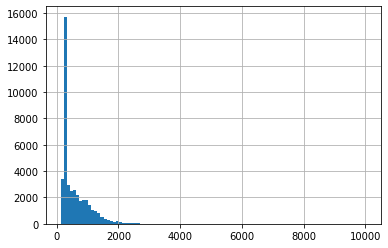

In [17]:
# Mostrando a distribuição dos valores de mensalidade
%matplotlib inline
df['mensalidade'].hist(bins=100)

In [18]:
df['mensalidade'].value_counts()

299.00     1270
278.00     1230
325.00     1213
237.00      969
270.00      927
           ... 
929.50        1
7558.50       1
1835.63       1
472.30        1
973.70        1
Name: mensalidade, Length: 7114, dtype: int64

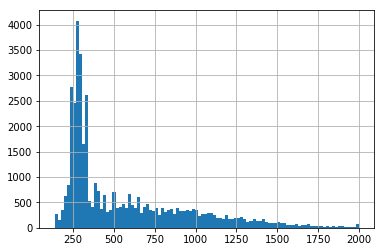

In [ ]:
# Histograma mostrando apenas os cursos que custam menos de R$2.000,00
df[df['mensalidade'] < 2000]['mensalidade'].hist(bins=100)

In [19]:
# Vamos criar um novo DataFrame apenas com os estados da Região Sul
regiao_sul = ['PR', 'SC', 'RS']
df_regiao_sul = df[df['uf_busca'].isin(regiao_sul)].copy()

df_regiao_sul.sample(5)

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
37766,RS,Porto Alegre,Pontifícia Universidade Católica do Rio Grande...,CENTRAL - PORTO ALEGRE - Partenon,Química,Bacharelado,Integral,1403.26,0.0,5.0,NaN,NaN,626.64,NaN,NaN,NaN
38777,RS,Vacaria,Universidade Pitágoras Unopar,VACARIA/RS (1051624) - Centro,Segurança no Trabalho,Tecnológico,Curso a Distância,209.00,0.0,1.0,NaN,NaN,535.52,NaN,NaN,NaN
41030,PR,Piraquara,Centro Universitário Internacional - Uninter -...,PAP PIRAQUARA - Jardim Bom Jesus dos Passos,Teologia,Bacharelado,Curso a Distância,189.00,0.0,1.0,NaN,NaN,450.00,NaN,NaN,NaN
11950,PR,Londrina,Universidade Pitágoras Unopar,CAMPUS UNIVERSITÁRIO LONDRINA - PIZA (SEDE) - ...,Educação Física,Bacharelado,Matutino,658.00,4.0,9.0,NaN,NaN,560.84,541.56,NaN,NaN
22409,RS,Cacapava do Sul,Centro Universitário Internacional - Uninter -...,PAP CAÇAPAVA DO SUL - Centro,Gestão da Tecnologia da Informação,Tecnológico,Curso a Distância,266.00,NaN,NaN,NaN,1.0,NaN,NaN,561.48,NaN


In [20]:
# Todos os comandos anteriores podem ser aplicados ao novo DataFrame

# Quais os cursos com mensalidade mais cara em cada UF?
df_regiao_sul.loc[df_regiao_sul.groupby('uf_busca')['mensalidade'].idxmax()]

,uf_busca,cidade_busca,universidade_nome,campus_nome,nome,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
11916,PR,Curitiba,Faculdade Dom Bosco - FDB,UNIDADE MERCÊS - Mercês,Educação Física,Licenciatura,Matutino,8466.72,1.0,2.0,NaN,NaN,579.20,570.40,NaN,NaN
32022,RS,Caxias do Sul,Universidade de Caxias do Sul - UCS,CAMPUS SEDE - Petrópolis,Medicina,Bacharelado,Integral,8329.95,1.0,4.0,NaN,NaN,745.42,751.32,NaN,NaN
32036,SC,Rio do Sul,Centro Universitário para O Desenvolvimento do...,CAMPUS DE RIO DO SUL - SEDE - Jardim América,Medicina,Bacharelado,Integral,6922.15,0.0,3.0,NaN,NaN,735.66,NaN,NaN,NaN


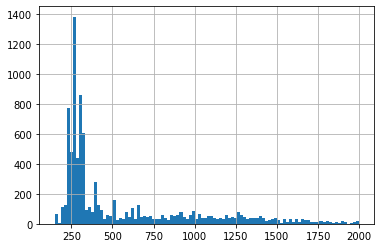

In [21]:
# Histograma mostrando apenas os cursos que custam menos de R$2.000,00
df_regiao_sul[df_regiao_sul['mensalidade'] < 2000]['mensalidade'].hist(bins=100)